In [1]:
import numpy as np

fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) #n_components: 압축할 특성 수
pca.fit(fruits_2d) #우리가 압축할 거!

PCA(n_components=50)

In [3]:
pca.components_.shape

(50, 10000)

In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))

    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')

    plt.show()

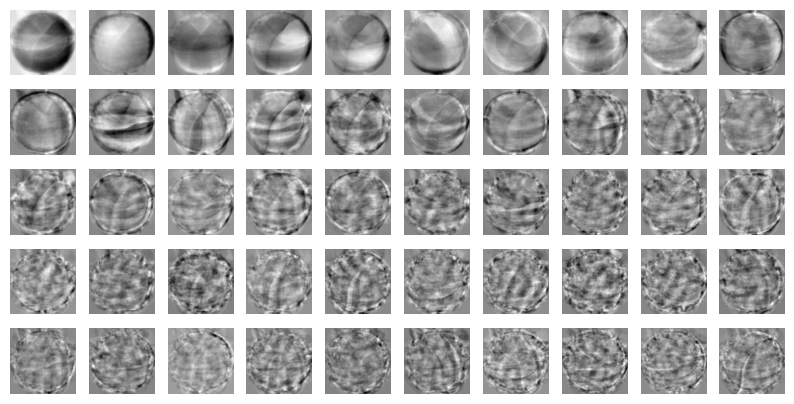

In [8]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [9]:
fruits_2d.shape

(300, 10000)

In [12]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [14]:
# 압축한 데이터 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

In [16]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

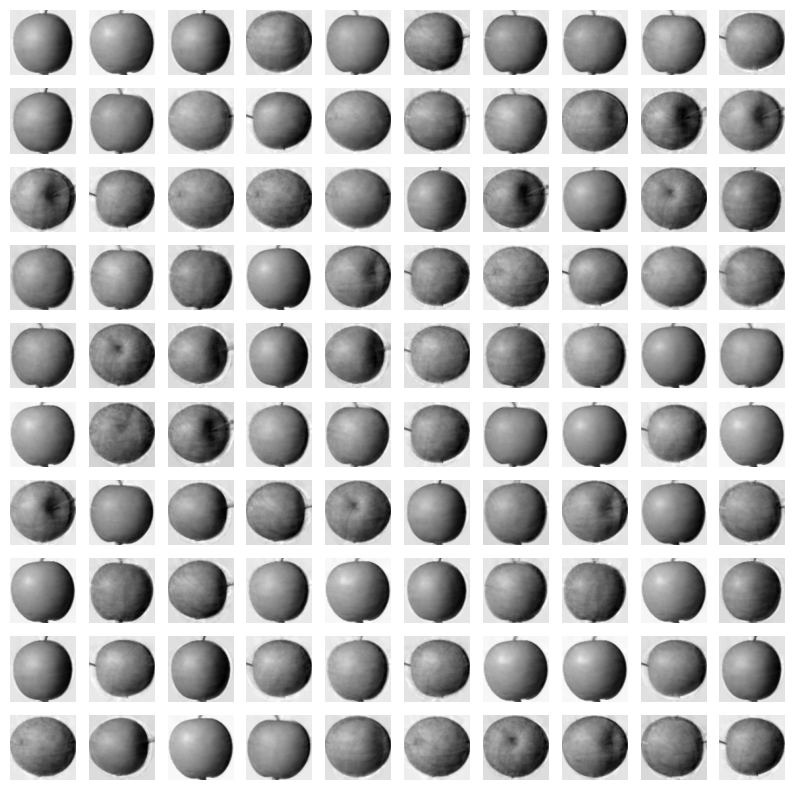

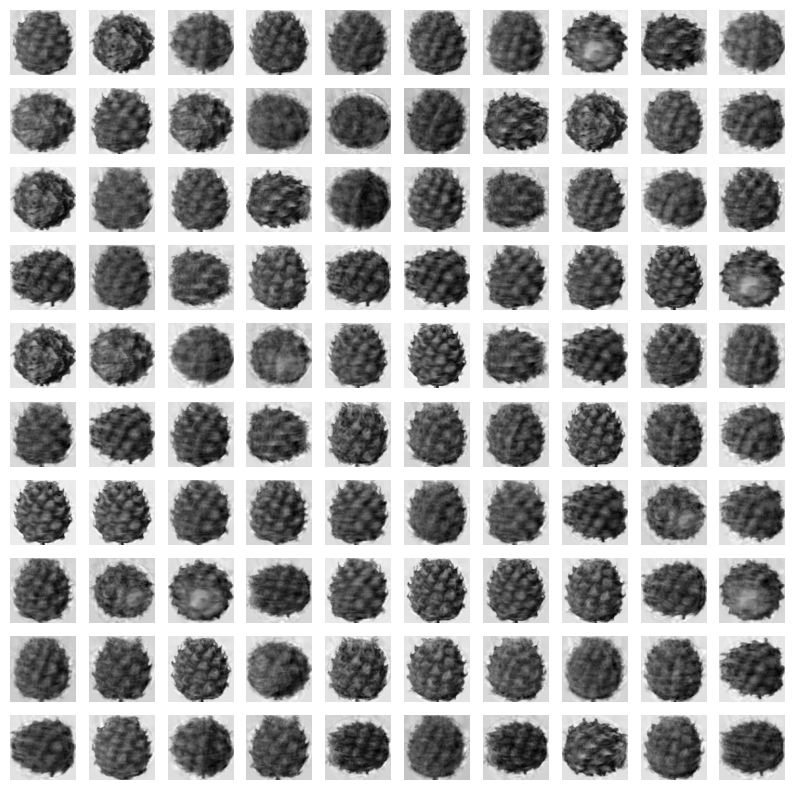

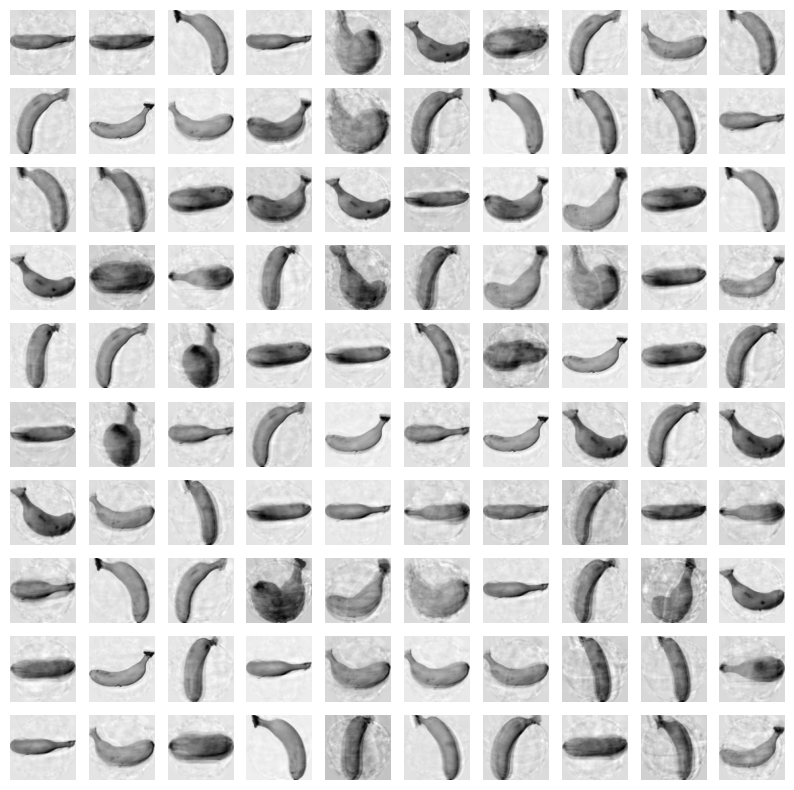

In [18]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

In [20]:
pca.explained_variance_ratio_ # 주성분 50개의 분산

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511201, 0.00486382, 0.00480347,
       0.00447836, 0.00437317, 0.00408038, 0.00389478, 0.00372439,
       0.00359276, 0.00331465, 0.00317847, 0.00304267, 0.00303752,
       0.00288947, 0.00275859, 0.00264952, 0.00255715, 0.00252074,
       0.00247443, 0.00239608, 0.00230956, 0.00222297, 0.00216742,
       0.00213874, 0.0019672 , 0.00192757, 0.00190214, 0.00184367,
       0.00182795, 0.0017265 , 0.00170058, 0.00162115, 0.00158315])

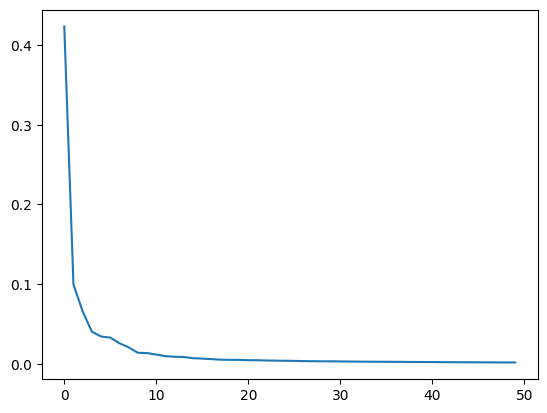

In [23]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression()

In [27]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [30]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
scores

{'fit_time': array([0.57014132, 0.24493575, 0.24504137, 0.20502138, 0.20967412]),
 'score_time': array([0.00398755, 0.00496888, 0.00398755, 0.00298381, 0.00399113]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [33]:
scores = cross_validate(lr, fruits_pca, target)
scores

# 학습 속도 차이 (특성 개수 때문)

{'fit_time': array([0.00598168, 0.00702667, 0.00293875, 0.00962067, 0.01182818]),
 'score_time': array([0.00099897, 0.        , 0.00099659, 0.00199485, 0.00099325]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [36]:
pca = PCA(n_components=0.5) # 잘 설명된 분산(주성분)의 비율이 전체의 50%가 될 때까지 찾아줘
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [38]:
pca.n_components_

np.int64(2)

In [40]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [43]:
scores = cross_validate(lr, fruits_pca, target)

scores

C:\Users\2-20\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\2-20\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

{'fit_time': array([0.0164206 , 0.01358533, 0.02211475, 0.01644182, 0.02201056]),
 'score_time': array([0.00193906, 0.        , 0.00066042, 0.00049758, 0.00053215]),
 'test_score': array([0.96666667, 1.        , 1.        , 0.98333333, 1.        ])}

In [74]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

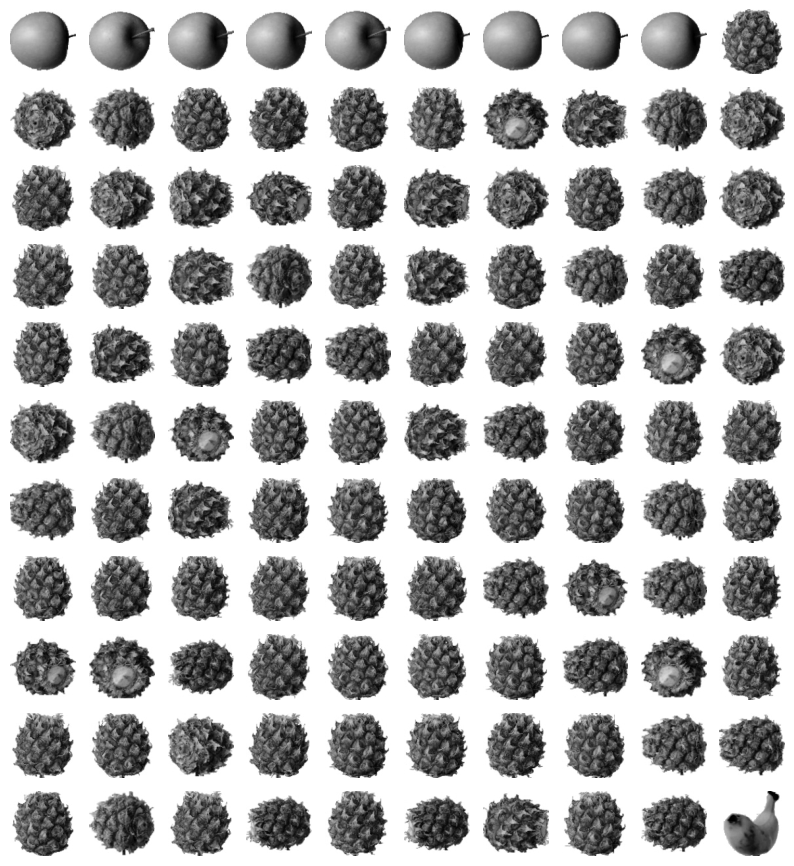

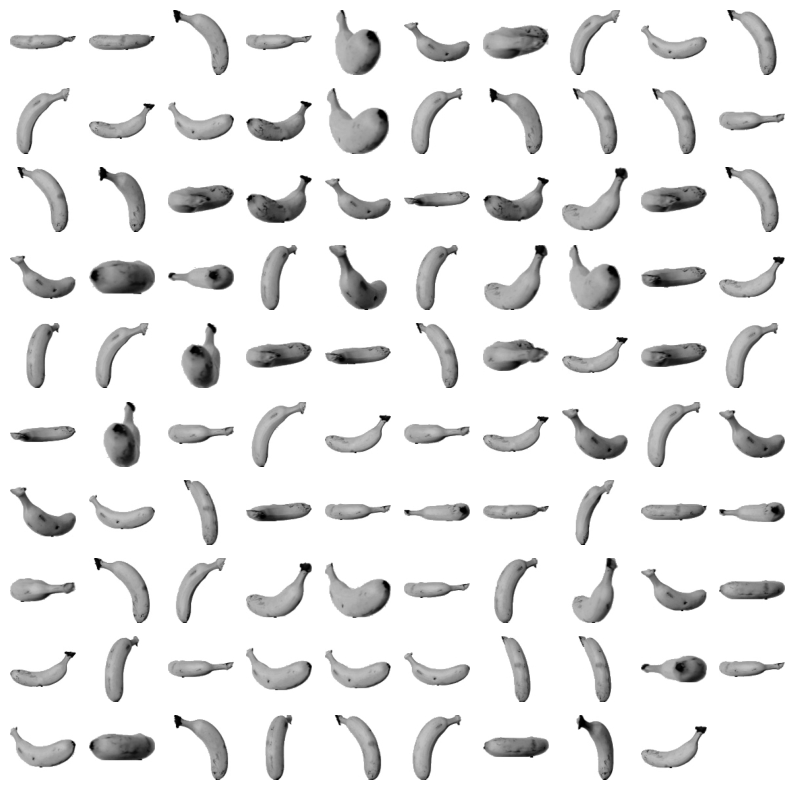

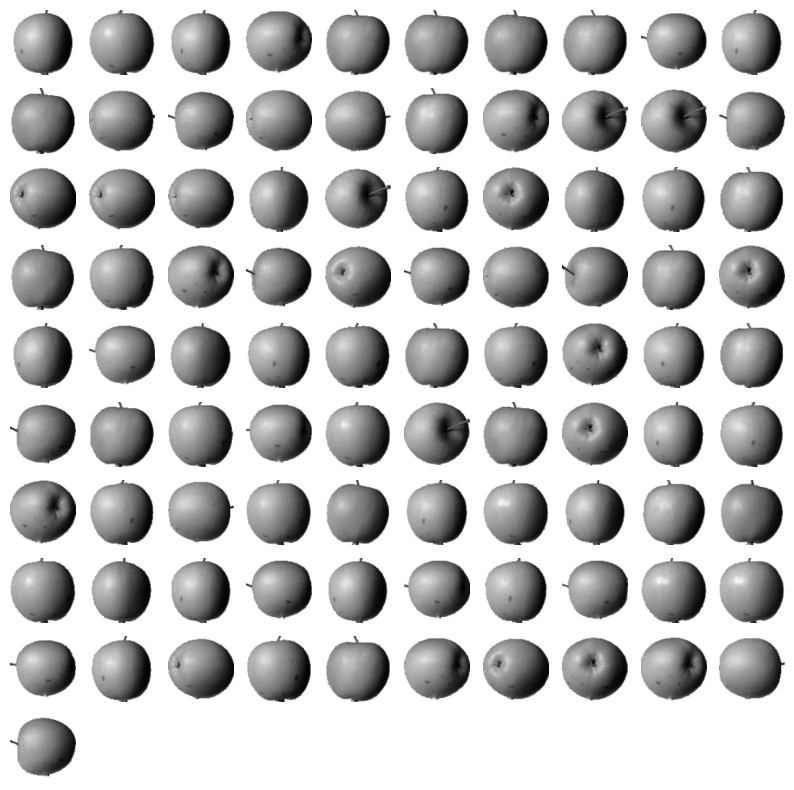

In [76]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

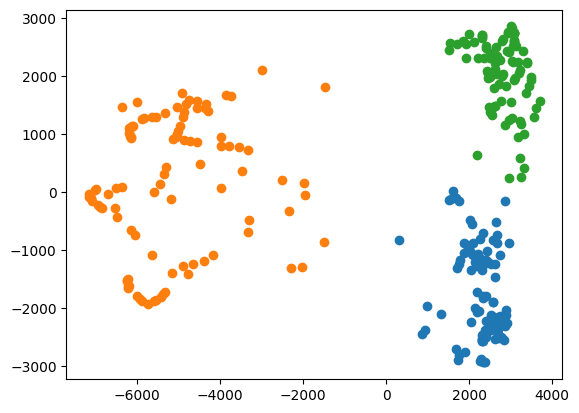

In [78]:
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1]) #모든 데이터의, n번째 특성

plt.show()